# Getting familiar with the data 

In this notebook, we are going to do some basic exploration of the dataset. We shall observe some samples from each dataset and try to fathom the inherent challenges.

In [1]:
# Importing necessary libraries
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2

In [2]:
# Declare constants which will be used while plotting the data
FS_AXIS_LABEL=14
FS_TITLE=17
FS_TICKS=12
FIG_WIDTH=20
ROW_HEIGHT=2

In [3]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
data_dir=os.path.join('..','/home/hasib/Files/Others/NumtaDB_with_aug')
print(os.listdir(data_dir))

['testing-d', 'testing-b', 'testing-augc', 'training-a', 'training-e', 'training-b', 'training-c', 'training-a.csv', 'training-d.csv', 'testing-f', 'training-d', 'testing-e', 'training-e.csv', 'training-c.csv', 'training-b.csv', 'testing-a', 'testing-auga', 'testing-c']


So there are 5 training datasets, 5 .csv files which contains the corresponding labels, and 8 testing datasets.

# Setup path variables

Next, we are going to get the image filepaths.  I am using the `os.path.join()` function to create the filepaths instead of writing them down explicitly with a  filepath separator ('\\' for windows '/' for linux). This allows the notebook to run both in windows and linux environment without manually changing the filepath separator.  The images generally have` .png` extension and some images in dataset `f`has jpg extension. We are going get all the filepaths using the `glob.glob()` function .


In [4]:
paths_train_a=glob.glob(os.path.join(data_dir,'training-a','*.png'))
paths_train_b=glob.glob(os.path.join(data_dir,'training-b','*.png'))
paths_train_e=glob.glob(os.path.join(data_dir,'training-e','*.png'))
paths_train_c=glob.glob(os.path.join(data_dir,'training-c','*.png'))
paths_train_d=glob.glob(os.path.join(data_dir,'training-d','*.png'))

paths_test_a=glob.glob(os.path.join(data_dir,'testing-a','*.png'))
paths_test_b=glob.glob(os.path.join(data_dir,'testing-b','*.png'))
paths_test_e=glob.glob(os.path.join(data_dir,'testing-e','*.png'))
paths_test_c=glob.glob(os.path.join(data_dir,'testing-c','*.png'))
paths_test_d=glob.glob(os.path.join(data_dir,'testing-d','*.png'))
paths_test_f=glob.glob(os.path.join(data_dir,'testing-f','*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.jpg'))

paths_test_auga=glob.glob(os.path.join(data_dir,'testing-auga','*.png'))
paths_test_augc=glob.glob(os.path.join(data_dir,'testing-augc','*.png'))

path_label_train_a=os.path.join(data_dir,'training-a.csv')
path_label_train_b=os.path.join(data_dir,'training-b.csv')
path_label_train_e=os.path.join(data_dir,'training-e.csv')
path_label_train_c=os.path.join(data_dir,'training-c.csv')
path_label_train_d=os.path.join(data_dir,'training-d.csv')

#print one as an example
print(path_label_train_a)

/home/hasib/Files/Others/NumtaDB_with_aug/training-a.csv


## Some Utility Functions

In [5]:
def get_img(path,mode=cv2.IMREAD_GRAYSCALE):
    # get image data
    img=cv2.imread(path)
    # opencv stores color images in BGR format by default, so transforming to RGB colorspace
    #img.shape gives row,colums, channels of img
    if len(img.shape)>2:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if img is not None:
        return img 
    else:
        raise FileNotFoundError('Image does not exist at {}'.format(path))
        
def imshow_group(paths,n_per_row=10):
    # plot multiple digits in one figure, by default 10 images are plotted per row
    n_sample=len(paths)
    j=np.ceil(n_sample/n_per_row)
    fig=plt.figure(figsize=(FIG_WIDTH,ROW_HEIGHT*j))
    for i, path in enumerate(paths):
        img=get_img(path)
        plt.subplot(j,n_per_row,i+1)
        if len(img.shape)<3: # if grayscale
            plt.imshow(img,cmap='gray')  
        else:
            plt.imshow(img)  
        plt.axis('off')
    return fig

def get_key(path):
    # separate the key from the filepath of an image
    return path.split(sep=os.sep)[-1]

## Check a few samples from dataset a

We are going to randomly choose a few image filepaths from training set `a`and plot them.

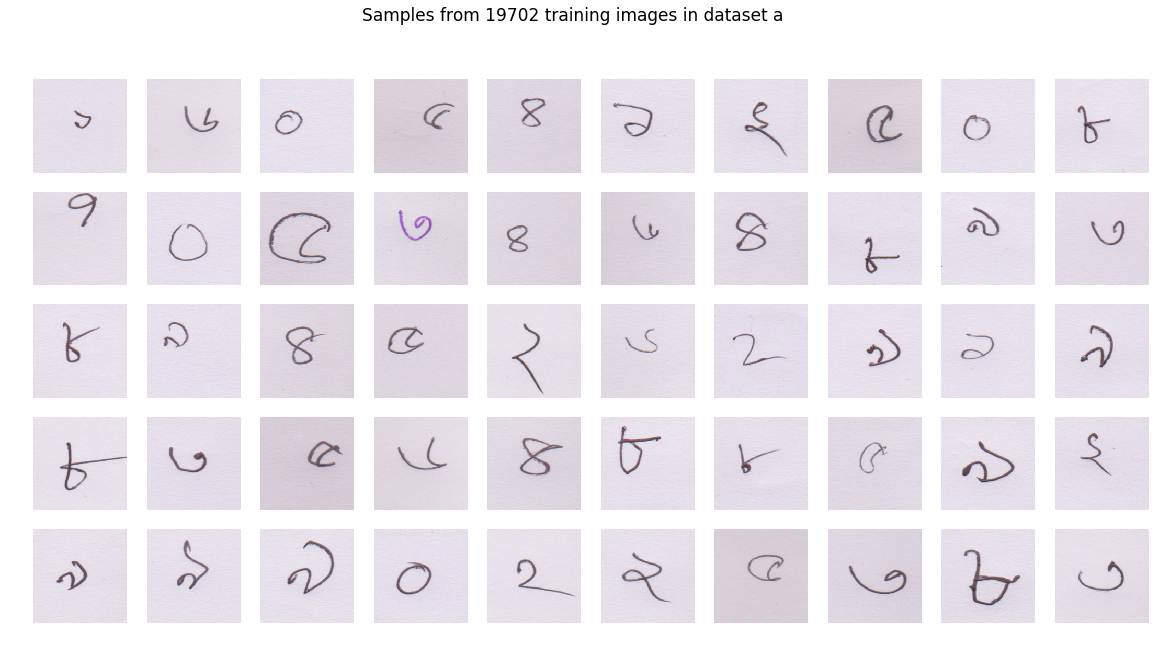

In [6]:
paths=np.random.choice(paths_train_a,size=50)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset a'.format(len(paths_train_a)), fontsize=FS_TITLE)
plt.show()

Dataset `a`consisits of color images. The digits do not fill up the entire image and most of them are not centered. 

## Check a few samples from dataset b

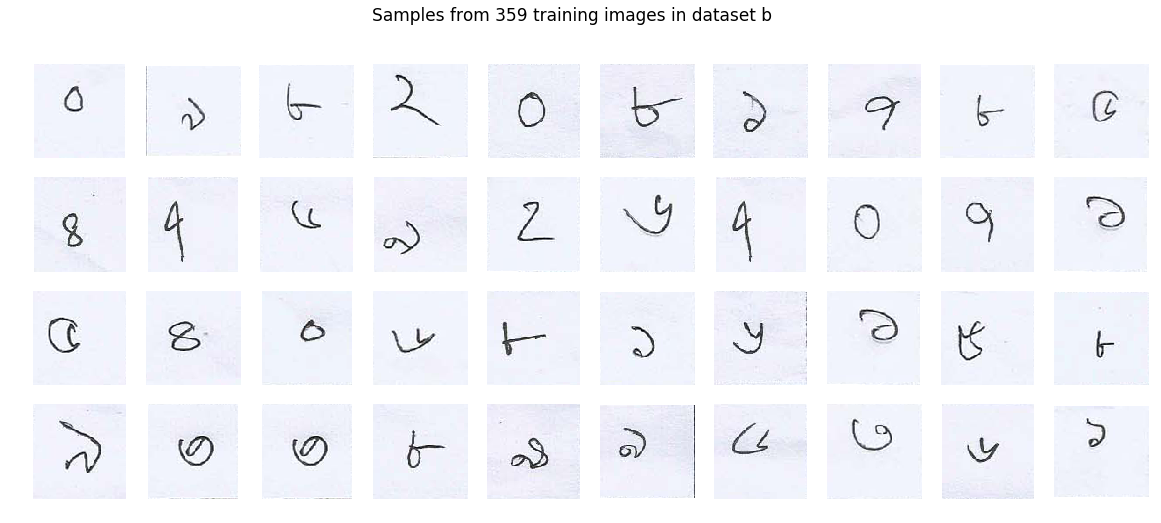

In [39]:
paths=np.random.choice(paths_train_b,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset b'.format(len(paths_train_b)), fontsize=FS_TITLE)
plt.show()

Similar to dataset `a`, most of the digits in `b` do not fill the entire image. Also most of them are not centered.

## Checking a few samples from dataset c

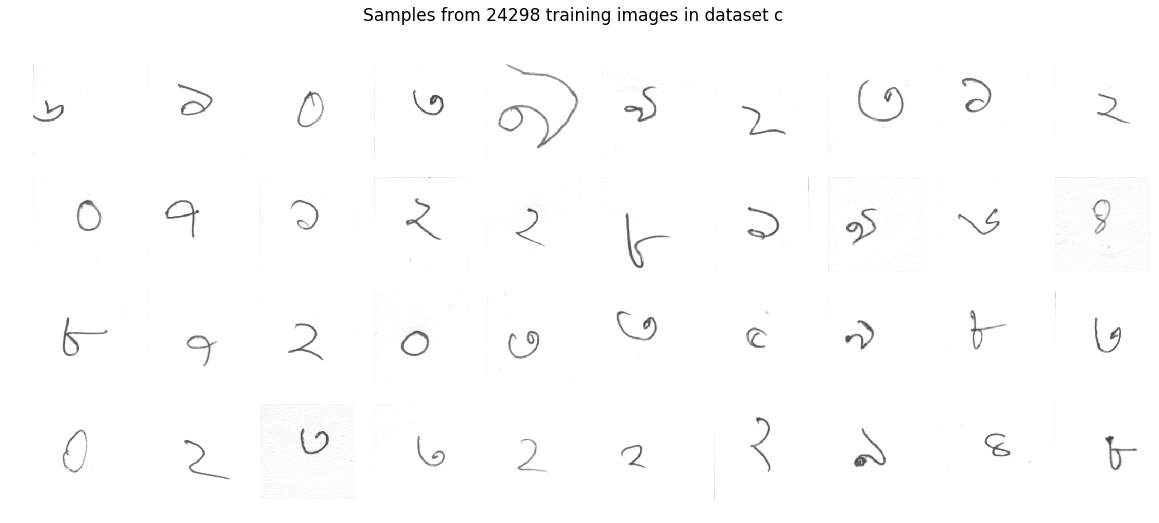

In [40]:
paths=np.random.choice(paths_train_c,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset c'.format(len(paths_train_c)), fontsize=FS_TITLE)
plt.show()

The images are in grayscale and have similar problem like dataset `a` and `b`.

## Check a few samples from dataset d

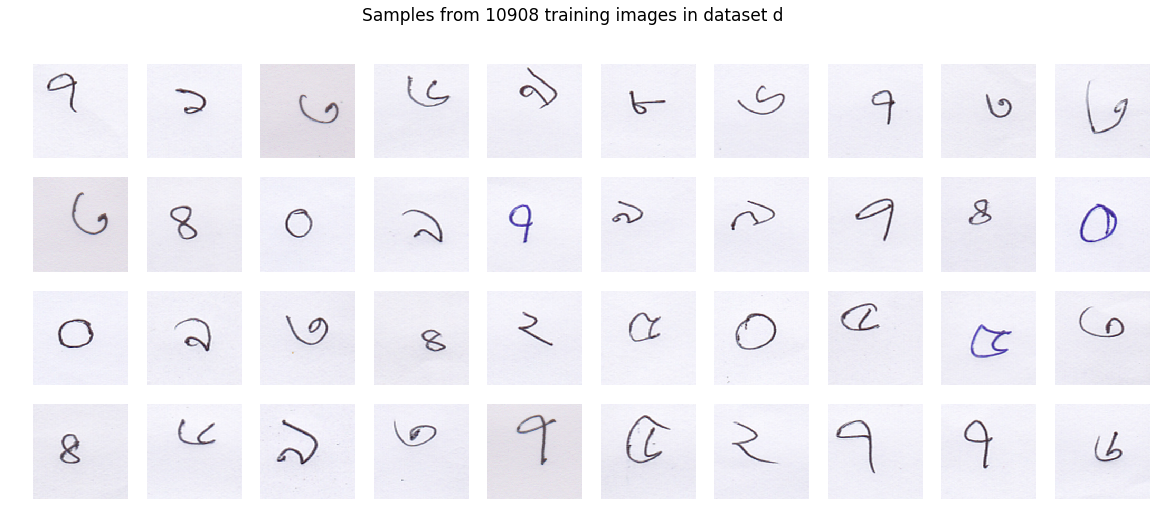

In [42]:
paths=np.random.choice(paths_train_d,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset d'.format(len(paths_train_d)), fontsize=FS_TITLE)
plt.show()

Images are in color.

## Checking samples from dataset e

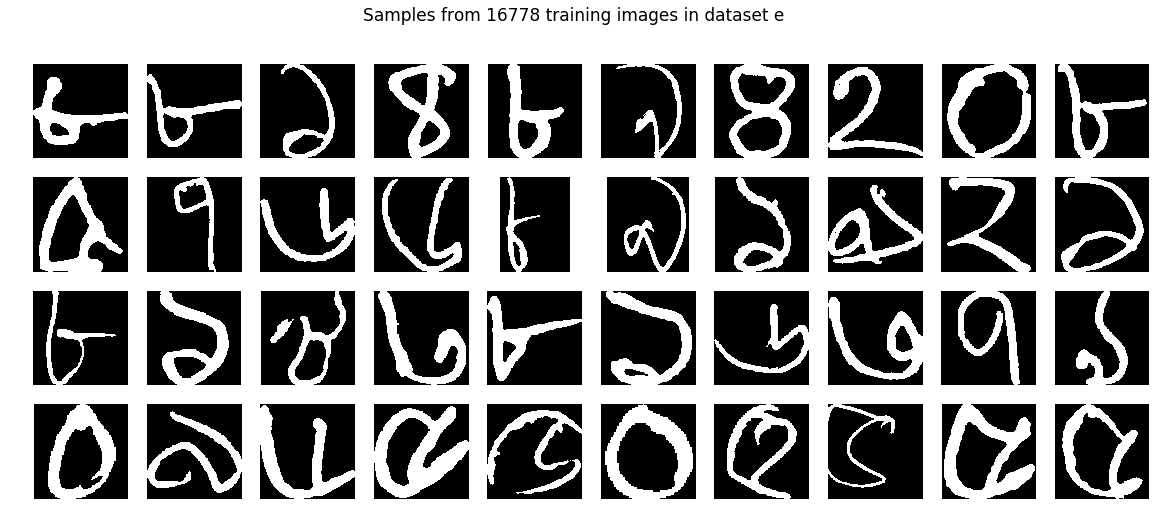

In [43]:
paths=np.random.choice(paths_train_e,40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset e'.format(len(paths_train_e)), fontsize=FS_TITLE)
plt.show()

The images are preprocessed binaries, cropped well and they have minimum non digit area.  

We have datast `f` which in used as a test set and two augmented test sets produced from `a` and `c`. Let's observe a few samples from them.

## Check a few samples from dataset f

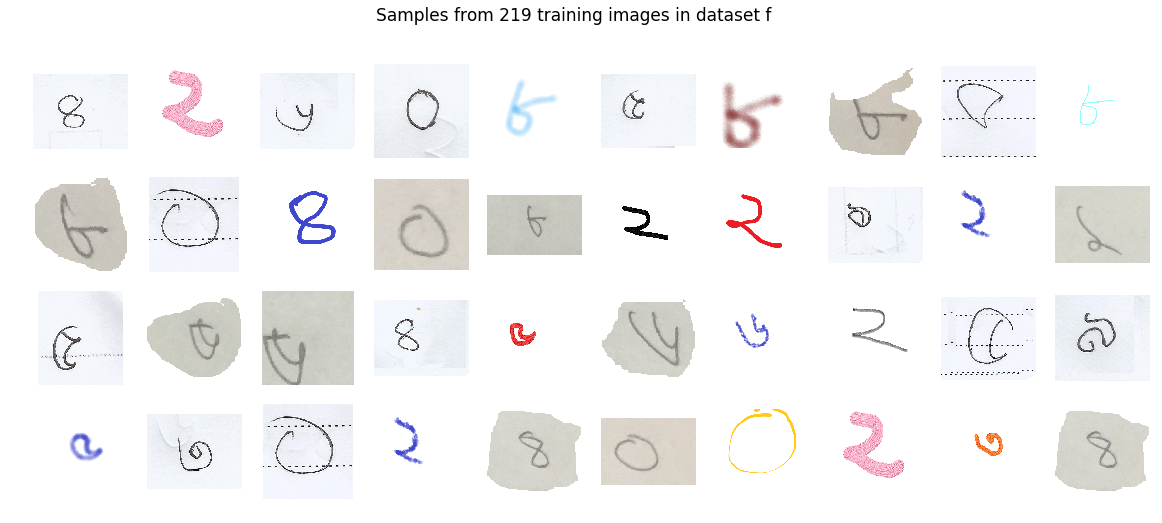

In [45]:
paths=np.random.choice(paths_test_f,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset f'.format(len(paths_test_f)), fontsize=FS_TITLE)
plt.show()

Some of the images in `f` are drawn with microsoft paint, some have background patterns, the background is not square shaped, along with the usual problems found in rest of the datasets

## Checking a few samples from dataset auga and augc

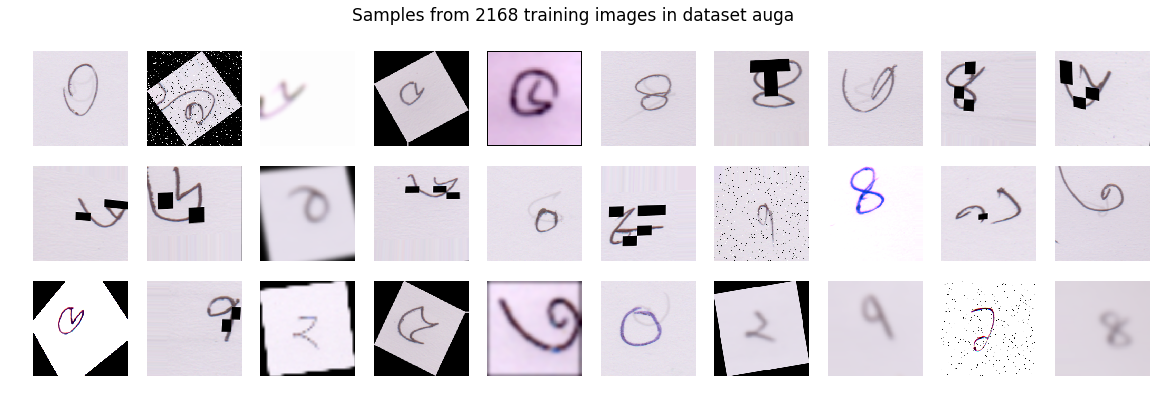

In [13]:
paths=np.random.choice(paths_test_auga,size=30)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset auga'.format(len(paths_test_auga)), fontsize=FS_TITLE)
plt.show()

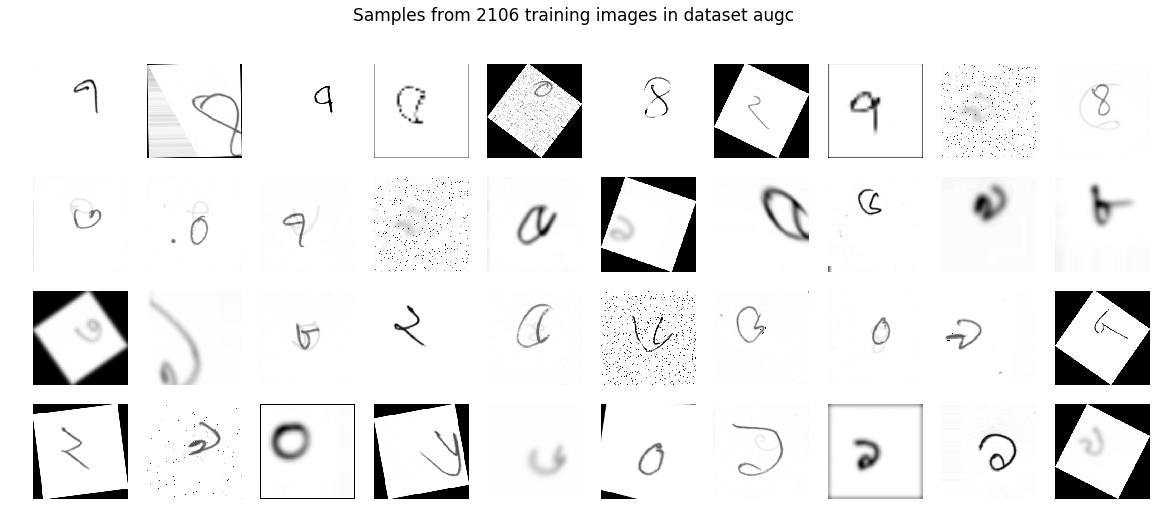

In [51]:
paths=np.random.choice(paths_test_augc,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset augc'.format(len(paths_test_augc)), fontsize=FS_TITLE)
plt.show()

These datasets have heavy augmantations which would make the challenge more difficult and hopefully, fun!

 # Conclusion

The images in datasets `a`to `d` could be further processed to extract a more focused crop of the digit. The presence of datasets `f`, `auga` and `auc` makes the competition very challenging. The participants will have to test with different image augmentation techniques to build an accurate model.